# <font color="#114b98">Conception d'une application permettant de générer un menu en fonction du régime suivi</font>



L'application génère des menus hebdomadaires personnalisés en fonction du régime suivi (végétarien, céto, etc.), avec des recettes adaptées aux préférences et restrictions de l'utilisateur. Elle simplifie la planification des repas, en proposant des idées variées pour chaque jour de la semaine.

Nous allons dans un premier temps **traiter le jeu de données afin de repérer des variables pertinentes** pour les traitements à venir et **automatiser ces traitements** pour éviter de répéter ces opérations.

## <font color="#00afe6">Sommaire</font>
[2.1. Colonnes et lignes vides / Doublons](#section_1)     
[2.2. Variables redondantes](#section_2)     
[2.3. Normalisation des pays](#section_3)     
[2.4. Les catégories de produits](#section_4)   
[2.5. Gestion du cas des labels](#section_5)  
[2.6. Enregistrement du fichier nettoyé](#section_6)   
 


## <font color="#00afe6">2. Nettoyage des données</font>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
# Download latest version
#path = kagglehub.dataset_download("openfoodfacts/world-food-facts")
# print("Path to dataset files:", path)


c:\Users\Calvyn\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Le jeu de données téléchargé en CSV sur le site [Open Food Facts](https://world.openfoodfacts.org/) est importé dans le Notebook via la méthode `read_csv` de la librairie `pandas`

In [3]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
datas = pd.read_csv("C:\\Users\\Calvyn\\Proton Drive\\calvynhdz\\Other computers\\PC-DE-CALVYN\\TP OpenFoodFacts\\en.openfoodfacts.org.products.csv", 
                    sep='\t', low_memory=False)


Affichons à présent quelques lignes au hasard du dataset puis regardons sa `shape`

In [4]:
datas.sample(5)





,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
209848,0075355112470,http://world-en.openfoodfacts.org/product/0075...,usda-ndb-import,1489143239,2017-03-10T10:53:59Z,1587635313,2020-04-23T09:48:33Z,100% juice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837495,3481894000159,http://world-en.openfoodfacts.org/product/3481...,kiliweb,1613655706,2021-02-18T13:41:46Z,1613655707,2021-02-18T13:41:47Z,Epices des rois mages,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282615,0208424016731,http://world-en.openfoodfacts.org/product/0208...,kiliweb,1596125301,2020-07-30T16:08:21Z,1604742150,2020-11-07T09:42:30Z,4 chaussons aux pommes,NaN,NaN,...,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1513568,8414892291484,http://world-en.openfoodfacts.org/product/8414...,kiliweb,1570107050,2019-10-03T12:50:50Z,1605185969,2020-11-12T12:59:29Z,Sal de mesa fina,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1471671,8410344111287,http://world-en.openfoodfacts.org/product/8410...,kiliweb,1575030658,2019-11-29T12:30:58Z,1579024627,2020-01-14T17:57:07Z,Aceitunas rellenas de anchoa,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print ("Le dataset compte {} lignes et {} variables".format(datas.shape[0], datas.shape[1]))

Le dataset compte 1701965 lignes et 184 variables


### <font color="#ea1c60" id="section_1">2.1. Colonnes et lignes vides / Doublons</font>
Regardons à présent les **variables qui comptent le plus de valeurs null**:

In [6]:
def null_factor(df, tx_threshold=50):
  null_rate = ((datas.isnull().sum() / datas.shape[0])*100).sort_values(ascending=False).reset_index()
  null_rate.columns = ['Variable','Taux_de_Null']
  high_null_rate = null_rate[null_rate.Taux_de_Null >= tx_threshold]
  return high_null_rate

In [7]:
full_null_rate = null_factor(datas, 100)
full_null_rate

,Variable,Taux_de_Null
0,additives,100.0
1,no_nutriments,100.0
2,ingredients_that_may_be_from_palm_oil,100.0
3,ingredients_from_palm_oil,100.0
4,allergens_en,100.0
5,cities,100.0
6,water-hardness_100g,100.0
7,nutrition-score-uk_100g,100.0


Nous allons regarder le taux de remplissage des variables graphiquement et fixer un **seuil de suppression à 25% de taux de remplissage. Nous considérons que ce qui est en dessous de 25% n'est pas utilisable, sauf exception,  et donc la colonne doit être supprimée :

C:\Users\Calvyn\AppData\Local\Temp\ipykernel_14548\2576690449.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Taux_de_Null", y="Variable", data=filling_features, palette="flare")


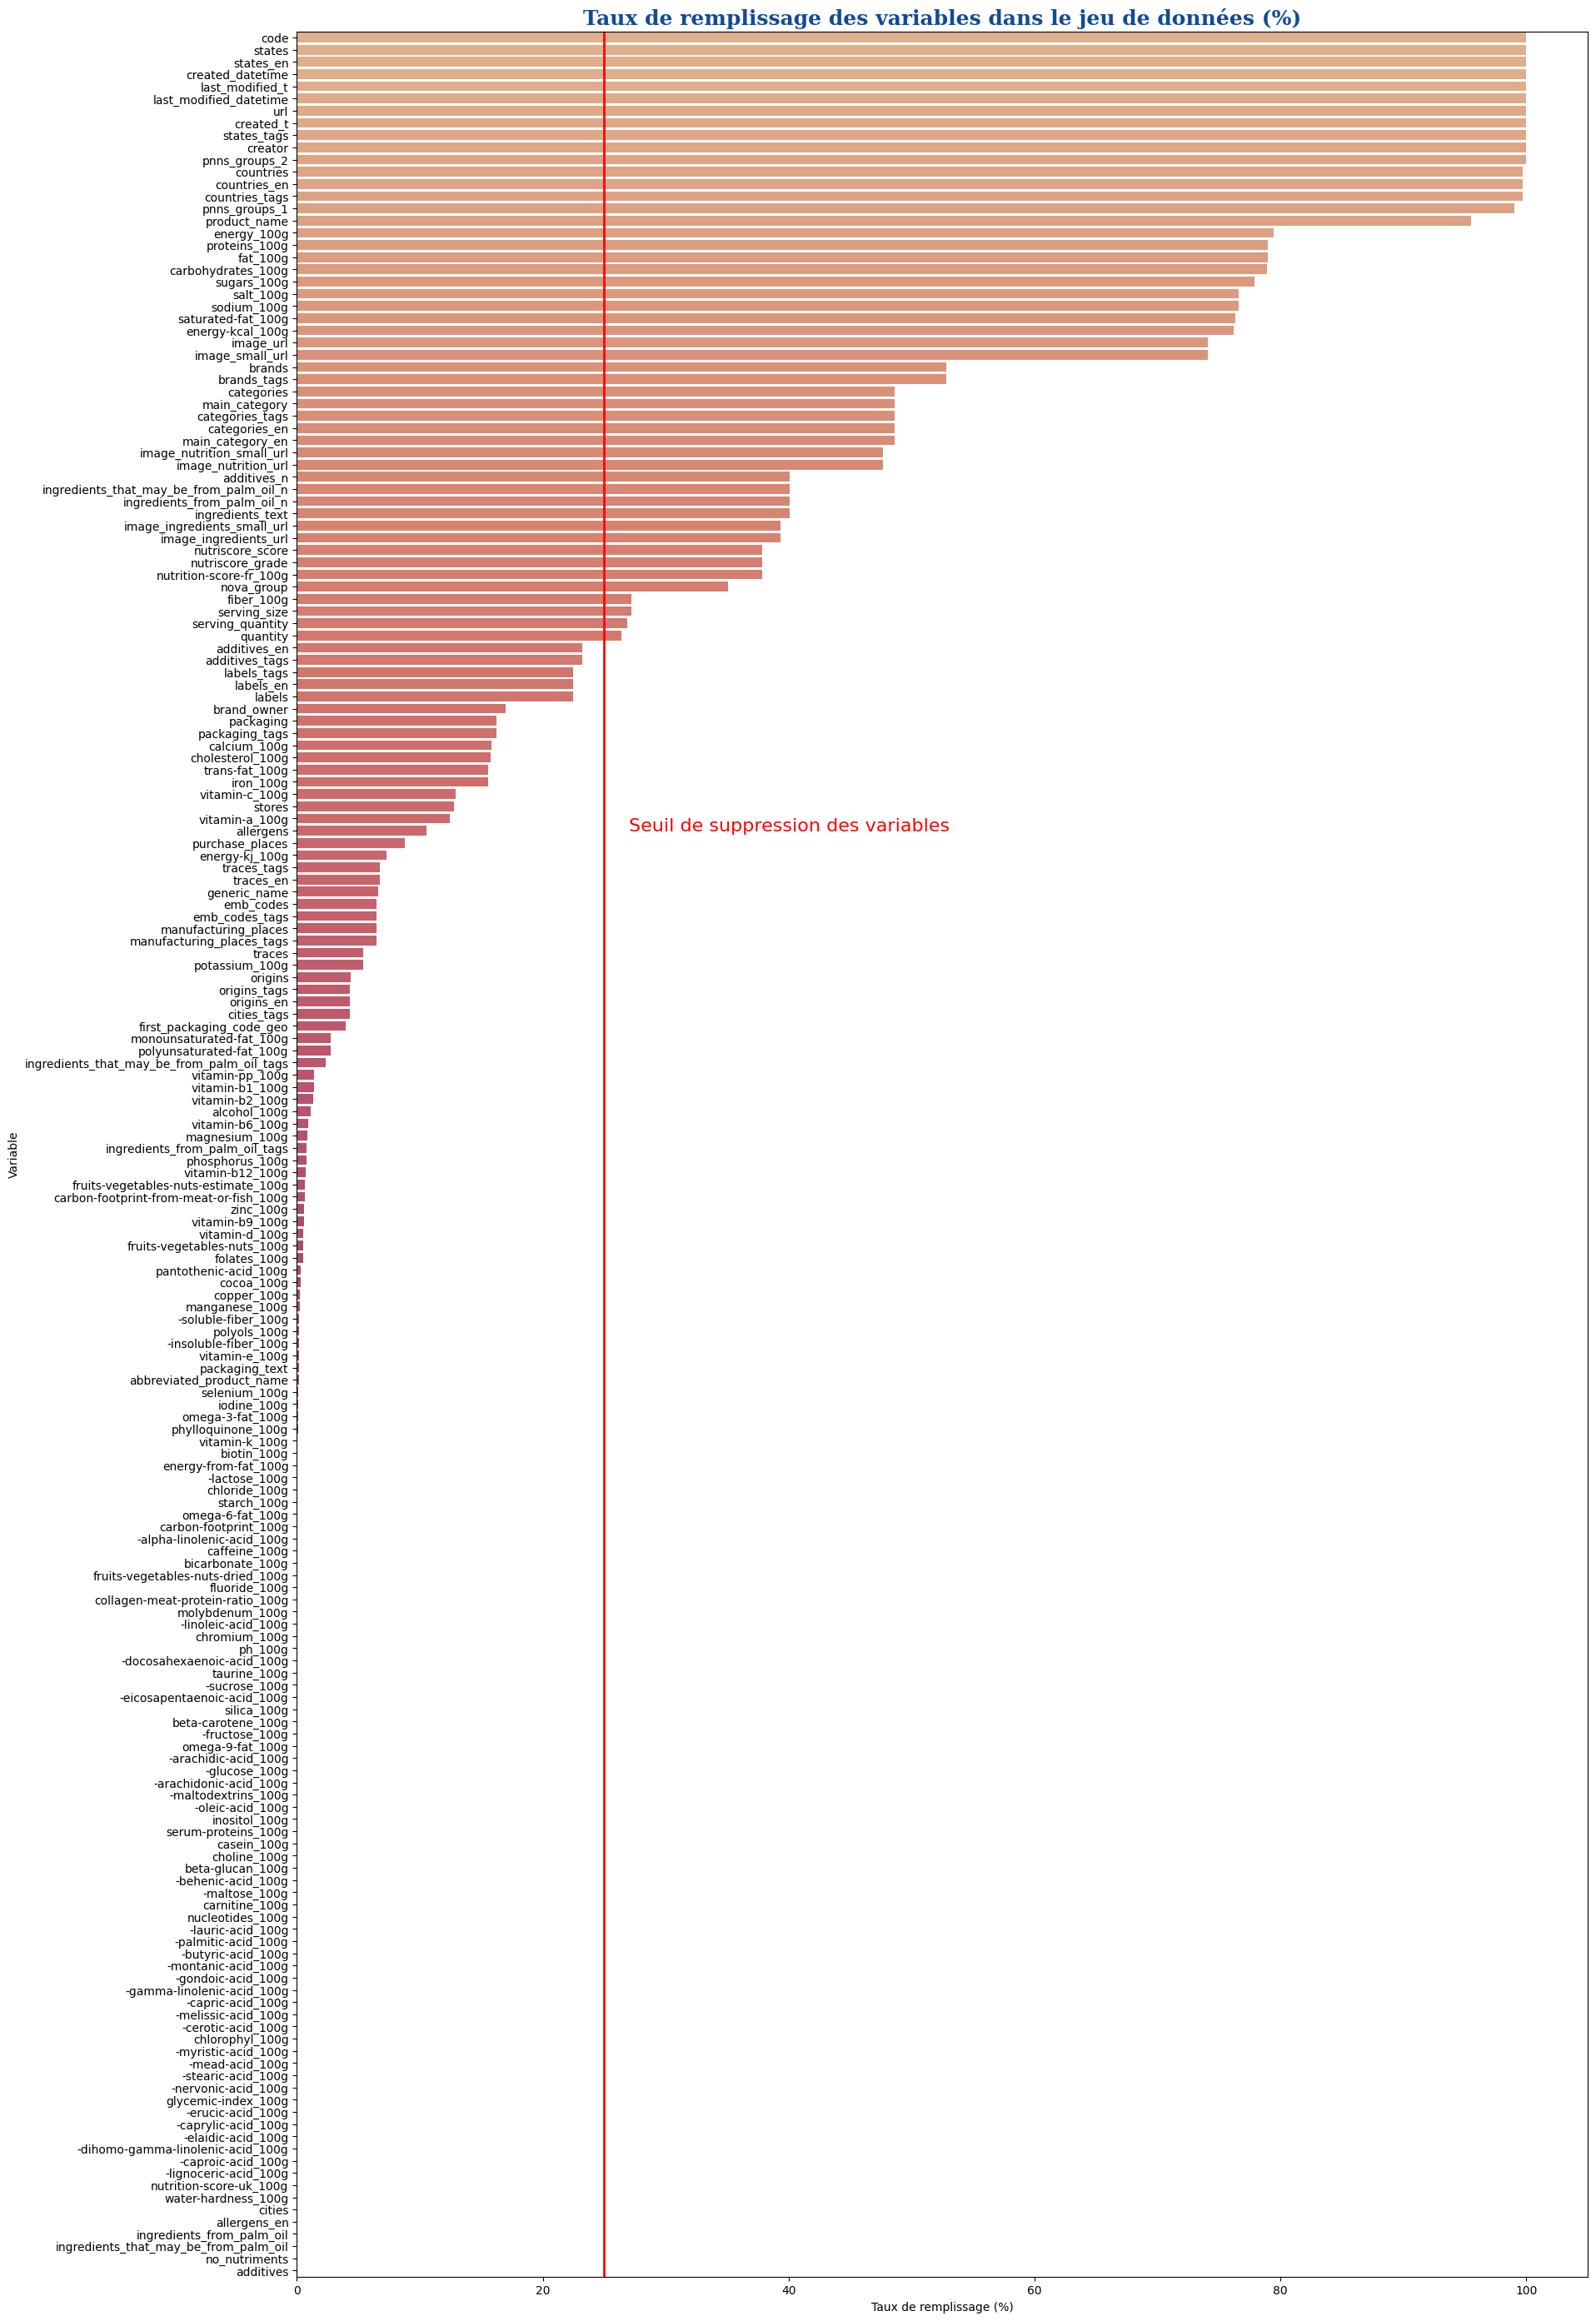

In [8]:
filling_features = null_factor(datas, 0)
filling_features["Taux_de_Null"] = 100-filling_features["Taux_de_Null"]
filling_features = filling_features.sort_values("Taux_de_Null", ascending=False)

#Seuil de suppression
sup_threshold = 25

fig = plt.figure(figsize=(20, 35))

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

sns.barplot(x="Taux_de_Null", y="Variable", data=filling_features, palette="flare")
#Seuil pour suppression des varaibles
plt.axvline(x=sup_threshold, linewidth=2, color = 'r')
plt.text(sup_threshold+2, 65, 'Seuil de suppression des variables', fontsize = 16, color = 'r')

plt.title("Taux de remplissage des variables dans le jeu de données (%)", fontdict=font_title)
plt.xlabel("Taux de remplissage (%)")
plt.show()

Nous conservons toutes les colonnes qui sont supérieures à 30% de remplissage au sein du dataset. Nous allons également conserver les colonnes labels car elles seront importantes dans la phase suivante qui se trouve être la transformation des données. Enfin, la colonne packaging doit également être conservée pour un traitement. 

In [9]:
# Liste des variables à conserver
features_to_conserve = list(filling_features.loc[filling_features['Taux_de_Null'] >= sup_threshold, 'Variable'].values)

# Nous gardons les colonnes labels car elles nous seront utiles dans la phase de traitement des données. La colonne packaging doit également être conservée
features_to_conserve.append("labels")
features_to_conserve.append("labels_en")
features_to_conserve.append("labels_tags")
features_to_conserve.append("packaging")
features_to_conserve.append("polyunsaturated-fat_100g")
features_to_conserve.append("monounsaturated-fat_100g")

# Liste des variables supprimées
deleted_features = list(filling_features.loc[filling_features['Taux_de_Null'] < sup_threshold, 'Variable'].values)

# Nouveau Dataset avec les variables conservées
datas = datas[features_to_conserve].sort_values(["created_datetime", "last_modified_datetime"], ascending=True)
datas.sample(5)
datas.shape


(1701965, 56)

155 features(colonnes) sur 184 ont un taux de valeurs nulles supérieur à 50%, ce qui représente une très grosse part de données manquantes. **La majeure partie de ces variables ne peuvent pas être recalculées** puisqu'il s'agit de mesures physico-chimiques directes sur les produits.

Il reste à présent 54 features dans notre dataset. Pour la suite des analyses, nous aurons besoin d'un minimum d'informations sur **les nutriments** des produits. Ces données sont **suffixées avec** `_100g`. Nous allons donc **conserver les lignes pour lesquelles au moins une de ces features est complétée** :

In [10]:
# Fonction pour rechercher les colonnes contenant '_100g'
def search_componant(df, suffix='_100g'):
    componant = []
    for col in df.columns:
        if suffix in col:
            componant.append(col)
    df_subset_columns = df[componant]
    return df_subset_columns

# Filtrer les colonnes "_100g"
df_subset_nutients = search_componant(datas, '_100g')

# Remplir les valeurs manquantes des colonnes "_100g" avec 0
df_subset_nutients_filled = df_subset_nutients.fillna(0)

# Mettre à jour les données principales avec les valeurs modifiées
datas[df_subset_nutients.columns] = df_subset_nutients_filled

# Maintenant, on élimine les lignes où toutes les colonnes de "_100g" sont NaN (si nécessaire)
datas = datas[df_subset_nutients_filled.notnull().any(axis=1)]

# Suppression des doublons en fonction du code
datas.drop_duplicates(subset ="code", keep = 'last', inplace=True)

# Vérifier la forme du dataframe après modification
datas.sample(5)



,code,states,states_en,created_datetime,last_modified_t,last_modified_datetime,url,created_t,states_tags,creator,...,fiber_100g,serving_size,serving_quantity,quantity,labels,labels_en,labels_tags,packaging,polyunsaturated-fat_100g,monounsaturated-fat_100g
1340198,7613312045596,"en:to-be-completed, en:nutrition-facts-complet...","To be completed,Nutrition facts completed,Ingr...",2017-02-07T22:00:40Z,1607375708,2020-12-07T21:15:08Z,http://world-en.openfoodfacts.org/product/7613...,1486504840,"en:to-be-completed,en:nutrition-facts-complete...",openfood-ch-import,...,0.0,NaN,NaN,15 g,organic,Organic,en:organic,Glas,0.0,0.0
311951,03003491670,"en:to-be-completed, en:nutrition-facts-complet...","To be completed,Nutrition facts completed,Ingr...",2020-04-23T20:16:25Z,1587672985,2020-04-23T20:16:25Z,http://world-en.openfoodfacts.org/product/0300...,1587672985,"en:to-be-completed,en:nutrition-facts-complete...",org-database-usda,...,4.6,2/3 cup (87 g),87.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
95344,0041268195084,"en:to-be-completed, en:nutrition-facts-complet...","To be completed,Nutrition facts completed,Ingr...",2017-03-09T16:57:49Z,1587590061,2020-04-22T21:14:21Z,http://world-en.openfoodfacts.org/product/0041...,1489078669,"en:to-be-completed,en:nutrition-facts-complete...",usda-ndb-import,...,0.0,0.25 cup (28 g),28.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
821483,3439495108538,"en:to-be-completed, en:nutrition-facts-complet...","To be completed,Nutrition facts completed,Ingr...",2017-06-11T14:17:54Z,1596970329,2020-08-09T10:52:09Z,http://world-en.openfoodfacts.org/product/3439...,1497190674,"en:to-be-completed,en:nutrition-facts-complete...",openfoodfacts-contributors,...,0.0,"3,5g",3.5,500 g,NaN,NaN,NaN,"Plastique,Sous atmosphère protectrice",0.0,0.0
789476,3362763020228,"en:to-be-completed, en:nutrition-facts-complet...","To be completed,Nutrition facts completed,Ingr...",2018-01-04T20:41:19Z,1589717415,2020-05-17T12:10:15Z,http://world-en.openfoodfacts.org/product/3362...,1515098479,"en:to-be-completed,en:nutrition-facts-complete...",kiliweb,...,0.0,NaN,NaN,140 g,en:never-frozen,Never frozen,en:never-frozen,NaN,0.0,0.0


In [11]:
import pandas as pd
import re

# Fonction pour vérifier si une chaîne est du texte (en supprimant les caractères non alphabétiques)
def is_text(value):
    return isinstance(value, str) and bool(re.match("^[A-Za-zÀ-ÖØ-öø-ÿ0-9\s,.'-]*$", value))

# Filtrer et garder uniquement les lignes avec des valeurs textuelles valides dans 'product_name' et 'brands'
datas = datas[(datas["product_name"].apply(is_text)) & (datas["brands"].apply(is_text))]

# Vérifier la forme du dataframe après nettoyage
datas.shape

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Calvyn\AppData\Local\Temp\ipykernel_14548\3784082962.py:6: SyntaxWarning: invalid escape sequence '\s'
  return isinstance(value, str) and bool(re.match("^[A-Za-zÀ-ÖØ-öø-ÿ0-9\s,.'-]*$", value))


(769256, 56)

In [12]:
# Filtre les produits et marques non nulles, les regroupe par nom de produit et marque, puis compte le nombre de codes uniques associés à chaque combinaison. Enfin, elle trie ces résultats par ordre décroissant du nombre de codes uniques.
datas = datas[(~datas.duplicated(["product_name","brands"],keep="last"))
      | ((datas['product_name'].isnull()) & (datas['brands'].isnull()))]

Après ce second nettoyage, nous avons 1 124 703 lignes et 46 colonnes.

In [13]:
datas.shape

(701335, 56)

### <font color="#ea1c60" id="section_2">2.2. Variables redondantes</font>

Certaines variables dans le dataset sont en réalité des variables redondantes. C'est par exemple le cas des variables suffixées par `_tags` ou `_en` qui ne font que reprendre d'autres features traduites ou simplifiées.

C'est par exemple de cas des catégories produits :

In [14]:
category_columns = ['categories','categories_tags','categories_en']
datas[datas[category_columns].notnull().any(axis=1)][['product_name'] + category_columns].sample(5)

,product_name,categories,categories_tags,categories_en
922246,Morceaux de thon Albacore au naturel,"Produits de la mer, Poissons, Thons, Thons au ...","en:seafood,en:fishes,en:tunas,en:tuna-in-brine","Seafood,Fishes,Tunas,Tuna in brine"
897008,Pate et salade poulet roti,"Plats préparés, Produits à la viande, Salades,...","en:meals,en:meat-based-products,en:salads,en:m...","Meals,Meat-based products,Salads,Meals with me..."
880987,Tartelettes aux citrons,fr:Tartelettes au citron,"en:pies,en:tartlets,en:fruit-tartlets,en:lemon...","Pies,Tartlets,Fruit tartlets,Lemon tartlets"
1415976,saftig.knackig,"Pflanzliche Lebensmittel und Getränke, Pflanzl...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo..."
526221,cuisse dinde,Viande dinde,fr:viande-dinde,fr:viande-dinde


On remarque dans ces quelques exemples que les variables sont bien redondantes. Nous allons donc, lorsque la colonne suffixée `_en` existe, supprimer toutes les autres colonnes identiques non suffixées ou contenant `_tags` :

In [15]:
def search_redundant_col(df):
  redundant_columns = []
  for col in df.columns:
    if "_en" in col:
      en = col.replace('_en','')
      tags = col.replace('_en','_tags')
      print("{:<20} 'Sans suffixe' -> {} ; 'Suffixe _tags' -> {}".format(col,
                                                                        en in df.columns, tags in df.columns))
      if en in df.columns :
        redundant_columns.append(en)
      if tags in df.columns :
        redundant_columns.append(tags)

    if '_tags' in col:
      tags_2 = col.replace('_tags','')
      print("{:<20} 'Suffixe _tags' -> {} ;".format(tags_2, tags_2 in df.columns))
      if tags_2 in df.columns :
        redundant_columns.append(col)

  return redundant_columns

In [16]:
datas.drop(search_redundant_col(datas), axis=1, inplace=True)

states_en            'Sans suffixe' -> True ; 'Suffixe _tags' -> True
states               'Suffixe _tags' -> True ;
countries_en         'Sans suffixe' -> True ; 'Suffixe _tags' -> True
countries            'Suffixe _tags' -> True ;
brands               'Suffixe _tags' -> True ;
categories           'Suffixe _tags' -> True ;
categories_en        'Sans suffixe' -> True ; 'Suffixe _tags' -> True
main_category_en     'Sans suffixe' -> True ; 'Suffixe _tags' -> False
labels_en            'Sans suffixe' -> True ; 'Suffixe _tags' -> True
labels               'Suffixe _tags' -> True ;


**Les dates également comportent une certaine redondance**. Entre les timestamp et les dates au format "yyyy-mm-dd", il est nécessaire d'en éliminer :

In [17]:
# Vérifiez les noms des colonnes
print(datas.columns)

# Si les colonnes existent sous un autre nom, ajustez ici :
# Par exemple, si 'created_t' s'appelle 'created_timestamp', modifiez en conséquence
if 'created_t' in datas.columns and 'last_modified_t' in datas.columns:
    datas['created_datetime'] = pd.to_datetime(datas['created_t'], unit='s')
    datas['last_modified_datetime'] = pd.to_datetime(datas['last_modified_t'], unit='s')
    datas = datas.drop(['created_t', 'last_modified_t'], axis=1)
else:
    print("Les colonnes 'created_t' et 'last_modified_t' sont absentes.")
datas.head(5)
datas.shape

Index(['code', 'states_en', 'created_datetime', 'last_modified_t',
       'last_modified_datetime', 'url', 'created_t', 'creator',
       'pnns_groups_2', 'countries_en', 'pnns_groups_1', 'product_name',
       'energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'salt_100g', 'sodium_100g', 'saturated-fat_100g',
       'energy-kcal_100g', 'image_url', 'image_small_url', 'brands',
       'categories_en', 'main_category_en', 'image_nutrition_small_url',
       'image_nutrition_url', 'additives_n',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'ingredients_text',
       'image_ingredients_small_url', 'image_ingredients_url',
       'nutriscore_score', 'nutriscore_grade', 'nutrition-score-fr_100g',
       'nova_group', 'fiber_100g', 'serving_size', 'serving_quantity',
       'quantity', 'labels_en', 'packaging', 'polyunsaturated-fat_100g',
       'monounsaturated-fat_100g'],
      dtype='object')


(701335, 44)

A présent, notre dataset compte 36 variables qui ne contienent plus de redondance et 701335 lignes. Nous allons maintenant nous intéresser à une variable importante : le pays. La colonne pays est une colonne critique et elle doit être normalisée

### <font color="#ea1c60" id="section_3">2.3. Normalisation des pays</font>

Regardons tout d'abord le nombre de pays représentés.

In [18]:
countries = datas.groupby(by="countries_en").nunique()

In [19]:
countries[['code']].head()

,code
countries_en,
Afghanistan,3
"Afghanistan,Belgium,France",2
"Afghanistan,France",99
"Afghanistan,France,French Guiana",1
"Afghanistan,France,Germany",1


Plusieurs pays sont regroupés dans la même variable, nous allons devoir effectuer un split du texte pour visualiser tout nos pays. La fonction split_words extrait tous les mots uniques d'une colonne spécifiée d'un DataFrame pandas, en les séparant par des virgules et en ignorant les valeurs manquantes.

In [20]:
def split_words(df, column='countries_en'):
    # Initialiser un ensemble pour stocker les mots uniques
    list_words = set()
    
    # Parcourir chaque entrée de la colonne spécifiée du DataFrame
    for word in df[column].str.split(','):
        # Si l'entrée est un flottant (NaN), passer à l'itération suivante
        if isinstance(word, float):
            continue
        # Ajouter les mots de l'entrée actuelle à l'ensemble list_words
        list_words = set().union(word, list_words)
    
    # Retourner la liste des mots uniques
    return list(list_words)


In [21]:
#Liste contenant tous les pays du jeu de données (bons ou mauvais)
list_countries = split_words(datas, 'countries_en')

In [22]:
print("Nombre de pays représentés : {}".format(len(list_countries)))

Nombre de pays représentés : 536


Nous allons charger une **base de données des pays, en Anglais**, pour déterminer les pays qui ne matchent pas *(mauvaise orthographe ou autre)*. En effet, il faut télécharger un dataset contenant les pays du monde entier dans format normalisé afin de bien parser les données du dataset OpenFoodFacts

In [23]:
df_countries = pd.read_csv("countries-en.csv",
                        sep=",", header=None, index_col = 0).rename(columns={0:"index", 1:"country_id", 2:"country_code_2", 3:"country_code_3", 4:"country_fr", 5:"country_en"})
df_countries.head()

,country_id,country_code_2,country_code_3,country_fr,country_en
0,,,,,
1,4,AF,AFG,Afghanistan,Afghanistan
2,8,AL,ALB,Albanie,Albania
3,10,AQ,ATA,Antarctique,Antarctica
4,12,DZ,DZA,Algérie,Algeria
5,16,AS,ASM,Samoa Américaines,American Samoa


In [24]:
df_countries = pd.merge(pd.DataFrame(list_countries, columns=["countries_dataset"]),df_countries, how="left",
         left_on="countries_dataset", right_on="country_en")

In [25]:
false_country_list = list(df_countries[df_countries.isnull().sum(axis=1)>0].countries_dataset)
false_country_list[0:15]

['Switzerland-francais',
 'es:franca',
 'fr:frankrijk',
 'Rumanien',
 'Norvege',
 'fr:zwitserland',
 'fr:hiszpania',
 'Lithuania-lietuvių',
 'Algerie',
 'Turkiye',
 'fr:martinica',
 'Grecja',
 'Suomi',
 'it:frankreich',
 'it:nd']

puis nous allons **supprimer ces pays "fantômes" de la base de données** :

In [26]:
for index, countries in datas['countries_en'].str.split(',').items():
  if isinstance(countries, float):
    continue
  country_name = []
  found = False
  for country in countries:
    if country in false_country_list:
      found = True
    else:
      country_name.append(country)
  if found:
    datas.loc[index, 'countries_en'] = ','.join(country_name)

In [27]:
print("Nouveau nombre de pays représentés : {}".format(len(split_words(datas, 'countries_en'))))

Nouveau nombre de pays représentés : 182


Le nombre de pays représenté est à présent plus cohérent et la perte d'informations est limitée. Il nous reste à présent à **compléter les valeurs nulles pour cette variable**.

In [28]:
datas['countries_en'] = np.where((datas['countries_en'].isnull()==True), "unknown",
                                 np.where(datas['countries_en'] == "", "unknown", datas['countries_en']))

Nous pouvons également regarder quels sont les **pays les plus représentés** :

In [29]:
def top_words(df, column="countries_en", nb_top=10):
    count_keyword = dict()
    for index, col in df[column].items():  # Utilisation de .items() au lieu de .iteritems()
        if isinstance(col, float):
            continue
        for word in col.split(','):
            word = word.strip()  # Nettoie les espaces autour du mot
            if word in count_keyword.keys():
                count_keyword[word] += 1
            else:
                count_keyword[word] = 1

    keyword_top = []
    for k, v in count_keyword.items():
        keyword_top.append([k, v])
    keyword_top.sort(key=lambda x: x[1], reverse=True)

    return keyword_top[:nb_top]

# Appel de la fonction et création du DataFrame
df_top_countries = pd.DataFrame(top_words(df=datas, column="countries_en", nb_top=10),
                                columns=["Keyword", "count"])
df_top_countries


,Keyword,count
0,France,331553
1,United States,147567
2,Spain,89088
3,Germany,48245
4,Switzerland,28619
5,Belgium,25532
6,United Kingdom,18818
7,Italy,13456
8,Canada,6697
9,Mexico,4563


In [30]:
print(datas.columns)

Index(['code', 'states_en', 'created_datetime', 'last_modified_datetime',
       'url', 'creator', 'pnns_groups_2', 'countries_en', 'pnns_groups_1',
       'product_name', 'energy_100g', 'proteins_100g', 'fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'salt_100g', 'sodium_100g',
       'saturated-fat_100g', 'energy-kcal_100g', 'image_url',
       'image_small_url', 'brands', 'categories_en', 'main_category_en',
       'image_nutrition_small_url', 'image_nutrition_url', 'additives_n',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_from_palm_oil_n', 'ingredients_text',
       'image_ingredients_small_url', 'image_ingredients_url',
       'nutriscore_score', 'nutriscore_grade', 'nutrition-score-fr_100g',
       'nova_group', 'fiber_100g', 'serving_size', 'serving_quantity',
       'quantity', 'labels_en', 'packaging', 'polyunsaturated-fat_100g',
       'monounsaturated-fat_100g'],
      dtype='object')


**La France et les Etats-Unis sont massivement représentés** dans le Dataset. Le 10ème Pays représenté en terme de volume ne compte plus que 4536 entrées - soit 73 fois moins que le 1er. Cette différence devra être prise en compte dans les futurs modèles développés.

### <font color="#ea1c60" id="section_4">2.4. Les catégories de produits</font>

Intéressons nous à présent à la catégorisation des produits. 4 variables représentent cette catégorisation de manière plus ou moins précise : `categories_en`, `main_category_en`, `pnns_groups_1`, `pnns_groups_2`.

In [31]:
datas[['categories_en','pnns_groups_1','pnns_groups_2','main_category_en',]].sample(10)

,categories_en,pnns_groups_1,pnns_groups_2,main_category_en
1615062,"Groceries,Meat-based products,Sauces,Meat-base...",Fat and sauces,Dressings and sauces,Bolognese sauces
36019,NaN,unknown,unknown,NaN
1200600,NaN,unknown,unknown,NaN
674439,"Dairies,Fermented foods,Fermented milk product...",Milk and dairy products,Cheese,Pasteurized camembert
641868,"Fish and meat and eggs,Foies gras,Foies gras f...",Salty snacks,Salty and fatty products,Foies gras from ducks
1676663,"Snacks,Sweet snacks,Confectioneries,Chocolate ...",Sugary snacks,Sweets,Bonbons
239854,"Dairies,Fermented foods,Fermented milk product...",Milk and dairy products,Milk and yogurt,Low-fat yogurts
667665,"Snacks,Sweet snacks,Biscuits and cakes,Biscuit...",Sugary snacks,Biscuits and cakes,Shortbread cookies
7540,"Plant-based foods and beverages,Plant-based fo...",Fruits and vegetables,Fruits,Canned fruits
6474,"Dairies,Milks",Milk and dairy products,Milk and yogurt,Milks


Nous allons regarder le **nombre total de catégories représentées** :

In [32]:
categories = split_words(df = datas, column = 'categories_en')
print("{} catégories sont représentées dans le jeu de données.".format(len(categories)))

26164 catégories sont représentées dans le jeu de données.


Ici également, nous allons regarder les **catégories les plus représentées**, après avoir remplacé les valeurs nulles et complété les valeurs inconnues des pnns avec la catégorie principale :

In [33]:
# Remplacer les valeurs manquantes ou vides dans la colonne 'categories_en' par "unknown"
datas['categories_en'] = np.where(
    (datas['categories_en'].isnull() == True),  # Si la valeur est manquante (NaN)
    "unknown",  # Remplacer par "unknown"
    np.where(  # Sinon, on vérifie si la valeur est une chaîne vide
        datas['categories_en'] == "",  # Si la valeur est une chaîne vide
        "unknown",  # Remplacer par "unknown"
        datas['categories_en']  # Sinon, garder la valeur d'origine
    )
)

# Remplacer les valeurs manquantes ou vides dans la colonne 'main_category_en' par "unknown"
datas['main_category_en'] = np.where(
    (datas['main_category_en'].isnull() == True),  # Si la valeur est manquante (NaN)
    "unknown",  # Remplacer par "unknown"
    np.where(  # Sinon, on vérifie si la valeur est une chaîne vide
        datas['main_category_en'] == "",  # Si la valeur est une chaîne vide
        "unknown",  # Remplacer par "unknown"
        datas['main_category_en']  # Sinon, garder la valeur d'origine
    )
)

# Remplacer les valeurs manquantes ou vides dans la colonne 'pnns_groups_1' par "unknown"
datas['pnns_groups_1'] = np.where(
    (datas['pnns_groups_1'].isnull() == True),  # Si la valeur est manquante (NaN)
    "unknown",  # Remplacer par "unknown"
    np.where(  # Sinon, on vérifie si la valeur est une chaîne vide
        datas['pnns_groups_1'] == "",  # Si la valeur est une chaîne vide
        "unknown",  # Remplacer par "unknown"
        datas['pnns_groups_1']  # Sinon, garder la valeur d'origine
    )
)

# Remplacer les valeurs manquantes ou vides dans la colonne 'pnns_groups_2' par "unknown"
datas['pnns_groups_2'] = np.where(
    (datas['pnns_groups_2'].isnull() == True),  # Si la valeur est manquante (NaN)
    "unknown",  # Remplacer par "unknown"
    np.where(  # Sinon, on vérifie si la valeur est une chaîne vide
        datas['pnns_groups_2'] == "",  # Si la valeur est une chaîne vide
        "unknown",  # Remplacer par "unknown"
        datas['pnns_groups_2']  # Sinon, garder la valeur d'origine
    )
)

In [34]:
df_top_categories = pd.DataFrame(top_words(df=datas, column="categories_en", nb_top=10),
                                 columns=["Keyword","count"])
df_top_categories

,Keyword,count
0,unknown,236353
1,Plant-based foods and beverages,142612
2,Plant-based foods,123967
3,Snacks,82115
4,Sweet snacks,58058
5,Beverages,56429
6,Cereals and potatoes,45442
7,Dairies,45188
8,Fruits and vegetables based foods,38416
9,Groceries,36315


Passons à présent aux variables `pnns_groups_1` et `pnns_groups_2` qui nous apporteront des informations plus précises :

In [35]:
pnns_groups_1 = split_words(df = datas, column = 'pnns_groups_1')
pnns_groups_2 = split_words(df = datas, column = 'pnns_groups_2')
print("{} catégories sont représentées dans la variable pnns_group_1.".format(len(pnns_groups_1)))
print("{} catégories sont représentées dans la variable pnns_group_2.".format(len(pnns_groups_2)))

14 catégories sont représentées dans la variable pnns_group_1.
46 catégories sont représentées dans la variable pnns_group_2.


In [36]:
pnns_groups_1

['Sugary snacks',
 'fruits-and-vegetables',
 'Composite foods',
 'Fat and sauces',
 'Salty snacks',
 'salty-snacks',
 'Fruits and vegetables',
 'Cereals and potatoes',
 'Milk and dairy products',
 'sugary-snacks',
 'Fish Meat Eggs',
 'cereals-and-potatoes',
 'unknown',
 'Beverages']

On voit ici que certaines catégories sont présentes plusieurs fois mais orthographiées différement :
- 'Cereals and potatoes' et 'cereals-and-potatoes'
- 'fruits-and-vegetables' et 'Fruits and vegetables'
- ...

Nous allons donc corriger le problème en passant le texte en miniscule et en remplaçant les caractères spéciaux par un espace :

In [37]:
datas["pnns_groups_1"] = datas["pnns_groups_1"].str.lower().str.replace('-', ' ')

In [38]:
pnns_groups_1 = split_words(df = datas, column = 'pnns_groups_1')
print("{} catégories sont représentées dans la variable pnns_group_1.".format(len(pnns_groups_1)))
print(pnns_groups_1)

10 catégories sont représentées dans la variable pnns_group_1.
['milk and dairy products', 'fish meat eggs', 'beverages', 'fruits and vegetables', 'fat and sauces', 'sugary snacks', 'salty snacks', 'cereals and potatoes', 'composite foods', 'unknown']


In [39]:
pnns_groups_2

['Cereals',
 'Chocolate products',
 'Dried fruits',
 'Soups',
 'Plant-based milk substitutes',
 'Ice cream',
 'Dairy desserts',
 'Processed meat',
 'Nuts',
 'Meat',
 'Potatoes',
 'Sweets',
 'Fish and seafood',
 'nuts',
 'Unsweetened beverages',
 'pastries',
 'Offals',
 'Sweetened beverages',
 'Milk and yogurt',
 'Waters and flavored waters',
 'legumes',
 'vegetables',
 'Alcoholic beverages',
 'Pizza pies and quiches',
 'Fruits',
 'Salty and fatty products',
 'Bread',
 'Cheese',
 'Fats',
 'Fruit juices',
 'Fruit nectars',
 'cereals',
 'Appetizers',
 'unknown',
 'One-dish meals',
 'Teas and herbal teas and coffees',
 'Biscuits and cakes',
 'Artificially sweetened beverages',
 'Sandwiches',
 'Vegetables',
 'fruits',
 'Breakfast cereals',
 'Dressings and sauces',
 'Pizza pies and quiche',
 'Eggs',
 'Legumes']

In [40]:
# Convertir toutes les valeurs dans la colonne 'pnns_groups_2' en minuscules
datas["pnns_groups_2"] = datas["pnns_groups_2"].str.lower()  # Convertit tous les mots en minuscules

# Remplacer tous les tirets par des espaces dans la colonne 'pnns_groups_2'
datas["pnns_groups_2"] = datas["pnns_groups_2"].str.replace('-', ' ')  # Remplace les tirets par des espaces

# Remplacer la chaîne 'pizza pies and quiche' par 'pizza pies and quiches' dans la colonne 'pnns_groups_2'
datas["pnns_groups_2"] = datas["pnns_groups_2"].replace('pizza pies and quiche','pizza pies and quiches')  # Correction d'un nom de groupe spécifique

# Utilisation de la fonction 'split_words' pour séparer les valeurs dans la colonne 'pnns_groups_2'
pnns_groups_2 = split_words(df = datas, column = 'pnns_groups_2')  # Sépare les valeurs de la colonne en mots (supposé être une fonction définie ailleurs)

# Affichage du nombre de catégories uniques dans la variable 'pnns_groups_2'
print("{} catégories sont représentées dans la variable pnns_group_2.".format(len(pnns_groups_2)))  # Affiche le nombre de catégories uniques


40 catégories sont représentées dans la variable pnns_group_2.


In [41]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 701335 entries, 943812 to 125945
Data columns (total 44 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   code                                     701335 non-null  object        
 1   states_en                                701335 non-null  object        
 2   created_datetime                         701335 non-null  datetime64[ns]
 3   last_modified_datetime                   701335 non-null  datetime64[ns]
 4   url                                      701335 non-null  object        
 5   creator                                  701332 non-null  object        
 6   pnns_groups_2                            701335 non-null  object        
 7   countries_en                             701335 non-null  object        
 8   pnns_groups_1                            701335 non-null  object        
 9   product_name              

### <font color="#ea1c60" id="section_5">1.5. Compléter les valeurs manquantes ou aberrantes</font>

Le jeu de données est nettoyé mais comme le montre les informations ci-dessus, il reste un grand nombre de valeurs manquantes qu'il va falloir compléter mais également des outliers à identifier. Les valeurs outliers sont des valeurs aberrantes. Cela signifie des valeurs beaucoup trop elevées par rapport aux autres valeurs. 

Regardons dans un premier temps une rapide description du Dataset :

In [42]:
datas.describe()

,created_datetime,last_modified_datetime,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,saturated-fat_100g,...,additives_n,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,nutriscore_score,nutrition-score-fr_100g,nova_group,fiber_100g,serving_quantity,polyunsaturated-fat_100g,monounsaturated-fat_100g
count,701335,701335,7.013350e+05,701335.000000,701335.000000,701335.000000,701335.000000,701335.000000,701335.000000,7.013350e+05,...,407259.000000,407259.000000,407259.000000,365517.000000,701335.000000,351187.000000,701335.000000,2.456010e+05,701335.000000,701335.000000
mean,2018-05-06 07:01:08.412607232,2020-03-10 03:24:19.557165824,5.186650e+07,7.003321,12.725175,26.075968,11.793578,2.128636,0.851459,1.837638e+01,...,1.858414,0.076499,0.027118,8.986463,4.683504,3.411570,1.182852,2.823816e+05,0.188565,0.326552
min,2012-01-31 14:43:58,2012-04-08 08:12:35,0.000000e+00,-500.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,-15.000000,-15.000000,1.000000,-20.000000,0.000000e+00,0.000000,0.000000
25%,2017-03-09 17:05:40,2020-01-11 12:24:43,1.840000e+02,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,2.800000e+01,0.000000,0.000000
50%,2018-04-08 19:41:56,2020-04-22 23:00:18,8.370000e+02,3.810000,3.220000,11.000000,2.600000,0.200000,0.080000,7.000000e-01,...,1.000000,0.000000,0.000000,9.000000,0.000000,4.000000,0.000000,5.000000e+01,0.000000,0.000000
75%,2019-08-22 19:13:51,2020-11-18 19:15:17,1.577000e+03,9.620000,17.100000,50.000000,14.000000,1.100000,0.440000,5.000000e+00,...,3.000000,0.000000,0.000000,16.000000,10.000000,4.000000,0.500000,1.130000e+02,0.000000,0.000000
max,2021-03-28 22:57:26,2021-03-29 00:47:29,3.637509e+13,173000.000000,999999.000000,762939.000000,6880.000000,79007.000000,31602.800000,9.999999e+06,...,32.000000,6.000000,3.000000,40.000000,40.000000,4.000000,2020.000000,6.864646e+10,204.000000,459.000000
std,NaN,NaN,4.343515e+10,206.826764,1199.151743,922.108433,20.824953,148.515570,59.404563,1.194093e+04,...,2.710467,0.323451,0.164560,8.924055,7.852292,0.968298,4.582297,1.385238e+08,2.161367,3.640594


On remarque déjà que les valeurs minimum et maximum de **certaines variables** (comme les nutriments ou la valeur energetique) **peuvent contenir des valeurs aberrantes**, ce qui impacte également l'écart-type et donc la variance.

In [43]:
datas[datas['energy_100g'] == datas['energy_100g'].max()]

,code,states_en,created_datetime,last_modified_datetime,url,creator,pnns_groups_2,countries_en,pnns_groups_1,product_name,...,nutrition-score-fr_100g,nova_group,fiber_100g,serving_size,serving_quantity,quantity,labels_en,packaging,polyunsaturated-fat_100g,monounsaturated-fat_100g
1627028,8693855001005,"To be completed,Nutrition facts completed,Ingr...",2020-03-11 19:45:23,2020-03-11 19:52:19,http://world-en.openfoodfacts.org/product/8693...,halal-app-chakib,unknown,Iraq,unknown,realmadrid real,...,0.0,NaN,0.0,200ml,200.0,madrid,Real-madrid,real,0.0,0.0


Ici, ce produit qui possède la plus grande valeur energétique n'est quasi pas complété. Il manque le nom du produit, les catégories et toutes les valeurs nutritionnelles. Nous allons **supprimer tous les produits qui n'ont ni nom, ni catégorie** et qui ne pourront donc être clairement identifiés.

In [44]:
datas_cleaned = datas[~((datas.product_name.isnull())
                        & ((datas.pnns_groups_1 == "unknown")
                           | (datas.main_category_en == "unknown")))]

In [45]:
datas_cleaned[((datas_cleaned.pnns_groups_1 == "unknown") & (datas_cleaned.main_category_en == "unknown") &
              (datas_cleaned.pnns_groups_2 == "unknown") & (datas_cleaned.categories_en == "unknown"))].shape[0]

236353

Il reste tout de même **236353 produits qui ne contiennent aucune indication de catégorie**.

Afin de pouvoir calculer des indicateurs corrects, nous allons remplacer par des valeurs nulles tous les max et min aberrants *(0, -1 ou 999999...)* :

In [46]:
#On repère les numerical_features
numerical_features = list(datas_cleaned.select_dtypes(include=["float64","int64"]).columns)
#On supprime les nutriscores qui eux peuvent être négatifs
numerical_features.remove('nutriscore_score')
numerical_features.remove('nutrition-score-fr_100g')
numerical_features.remove('ingredients_that_may_be_from_palm_oil_n')
numerical_features.remove('ingredients_from_palm_oil_n')
numerical_features.remove('nova_group')

In [47]:
#On supprime les lignes dont toutes les numerical_features sont à 0 ou nulles
datas_cleaned = datas_cleaned.loc[~((datas_cleaned[numerical_features]==0) | (datas_cleaned[numerical_features].isnull())).all(axis=1)]

In [48]:
#On supprime les lignes contenant des valeurs négatives et des max aberrants
datas_cleaned = datas_cleaned[~(datas_cleaned[numerical_features] < 0).any(axis=1)]
datas_cleaned = datas_cleaned[~(datas_cleaned[numerical_features].isin([999999,9999999])).any(axis=1)]
for col in datas_cleaned.columns:
    print(col)

code
states_en
created_datetime
last_modified_datetime
url
creator
pnns_groups_2
countries_en
pnns_groups_1
product_name
energy_100g
proteins_100g
fat_100g
carbohydrates_100g
sugars_100g
salt_100g
sodium_100g
saturated-fat_100g
energy-kcal_100g
image_url
image_small_url
brands
categories_en
main_category_en
image_nutrition_small_url
image_nutrition_url
additives_n
ingredients_that_may_be_from_palm_oil_n
ingredients_from_palm_oil_n
ingredients_text
image_ingredients_small_url
image_ingredients_url
nutriscore_score
nutriscore_grade
nutrition-score-fr_100g
nova_group
fiber_100g
serving_size
serving_quantity
quantity
labels_en
packaging
polyunsaturated-fat_100g
monounsaturated-fat_100g


Les variables suffixées avec `_100g` nous indiquent la quantité de nutriments pour 100 grammes de produit. Les valeurs renseignées ne peuvent donc logiquement pas excéder 100. Nous allons donc **supprimer les lignes dont au moins 1 des variables de nutriments est supérieur au seuil**. Ici, nous fixons le seuil à 100 :

In [49]:
g_per_100g_features = ['proteins_100g','fat_100g','carbohydrates_100g','sugars_100g','salt_100g',
                       'sodium_100g','saturated-fat_100g']
datas_cleaned = datas_cleaned[~(datas_cleaned[g_per_100g_features] > 100).any(axis=1)]

D'autre part, les valeurs de `saturated-fat_100g` ne peuvent pas être supérieurs à `fat_100g`, de même pour les valeurs de `sodium_100g` qui ne peuvent pas être supérieurs à `salt_100g`.     
Nous allons donc supprimer les lignes qui remplissent ces conditions :

In [50]:
datas_cleaned = datas_cleaned[~((datas_cleaned['saturated-fat_100g'] > datas_cleaned['fat_100g'])
                                | (datas_cleaned['sodium_100g'] > datas_cleaned['salt_100g']))]

Enfin, les densité d'energie maximales pour 100g sont de 3700 kJ/100g *(source [Wikipedia](https://en.wikipedia.org/wiki/Food_energy))*. Nous allons donc supprimer toutes les lignes dont la variable `energy_100g` est supérieur à 3700 *(ou 900 kcal/100g)*.

In [51]:
datas_cleaned = datas_cleaned[~((datas_cleaned['energy_100g'] > 3700)
                                | (datas_cleaned['energy-kcal_100g'] > 900))]

In [52]:
datas_cleaned.shape

(601468, 44)

In [53]:
datas_cleaned.describe()

,created_datetime,last_modified_datetime,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,salt_100g,sodium_100g,saturated-fat_100g,...,additives_n,ingredients_that_may_be_from_palm_oil_n,ingredients_from_palm_oil_n,nutriscore_score,nutrition-score-fr_100g,nova_group,fiber_100g,serving_quantity,polyunsaturated-fat_100g,monounsaturated-fat_100g
count,601468,601468,601468.000000,601468.000000,601468.000000,601468.000000,601468.000000,601468.000000,601468.000000,601468.000000,...,384163.000000,384163.000000,384163.000000,361014.000000,601468.000000,336032.000000,601468.000000,2.416940e+05,601468.000000,601468.000000
mean,2018-03-29 18:40:15.374821120,2020-03-18 19:10:16.536022272,1091.505515,7.781334,12.526635,28.735485,13.618741,1.279896,0.511947,4.594358,...,1.963279,0.080539,0.028545,9.001050,5.402623,3.463390,1.358451,2.869431e+05,0.206519,0.356155
min,2012-01-31 14:43:58,2012-04-08 08:12:35,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-15.000000,-15.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2017-03-09 16:19:18,2020-01-26 11:04:40,381.000000,1.000000,0.500000,3.900000,0.620000,0.030000,0.012000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,2.800000e+01,0.000000,0.000000
50%,2018-02-15 20:00:18.500000,2020-04-22 23:14:49,1046.000000,5.380000,5.700000,15.800000,3.700000,0.435000,0.174000,1.400000,...,1.000000,0.000000,0.000000,10.000000,0.000000,4.000000,0.000000,5.000000e+01,0.000000,0.000000
75%,2019-07-09 10:16:35.249999872,2020-11-17 11:49:35.500000,1644.000000,11.000000,20.000000,54.000000,19.000000,1.250000,0.500000,6.200000,...,3.000000,0.000000,0.000000,16.000000,12.000000,4.000000,1.200000,1.130000e+02,0.000000,0.000000
max,2021-03-28 21:25:08,2021-03-29 00:47:29,3700.000000,100.000000,100.000000,100.000000,100.000000,100.000000,40.000000,100.000000,...,32.000000,6.000000,3.000000,40.000000,40.000000,4.000000,2020.000000,6.864646e+10,98.000000,100.000000
std,NaN,NaN,779.923254,9.085639,16.346056,28.257281,19.838041,4.993467,1.997378,7.331067,...,2.749324,0.331577,0.168714,8.931174,8.204761,0.925333,4.647789,1.396389e+08,2.180194,3.619101


In [54]:
datas_cleaned.isnull().sum().sort_values(ascending=False)

packaging                                  430634
labels_en                                  403679
serving_quantity                           359774
serving_size                               356403
quantity                                   349131
image_ingredients_url                      274607
image_ingredients_small_url                274607
nova_group                                 265436
image_nutrition_url                        262601
image_nutrition_small_url                  262601
nutriscore_score                           240454
nutriscore_grade                           240454
ingredients_text                           217306
ingredients_from_palm_oil_n                217305
additives_n                                217305
ingredients_that_may_be_from_palm_oil_n    217305
image_small_url                            156958
image_url                                  156958
creator                                         2
product_name                                    0


#### Dorénavant, nous allons appliquer un dernier nettoyage permettant de retirer les colonnes inutiles dans les phases de traitement et d'agrégation des données, lors du chargement du dataset dans l'ETL PySpark.

### <font color="#ea1c60" id="section_5">2.5. Gestion du cas des labels</font>

### Les valeurs présentes dans le champ "Label" ne peuvent pas être utilisées en l'état actuel. Nous allons ainsi procéder au nettoyage de celles-ci à partir de régime nutritionnel spécifique. Par exemple, le régime Keto consiste à minimiser la consommation de glucide et à préfer la consommation d'élèments riches en matières grasses (fat). Si un aliment répond à ces critères, alors il sera classé avec le label "Keto". Nous réalisons cette opération pour l'ensemble des régimes demandés : Keto, Paleo, Mediterannean et Dash.

In [73]:
import pandas as pd
import re  # Importer le module des expressions régulières

# Fonction pour attribuer les labels en fonction des critères des régimes
def assign_labels(row):
    labels = []
    
    # Récupérer les valeurs nécessaires pour chaque ligne, en remplaçant les valeurs manquantes par zéro
    fat = row['fat_100g'] if pd.notna(row['fat_100g']) else 0
    carbohydrates = row['carbohydrates_100g'] if pd.notna(row['carbohydrates_100g']) else 0
    sodium = row['sodium_100g'] if pd.notna(row.get('sodium_100g', None)) else 0
    polyunsaturated_fat = row['polyunsaturated-fat_100g'] if pd.notna(row['polyunsaturated-fat_100g']) else 0
    saturated_fat = row['saturated-fat_100g'] if pd.notna(row['saturated-fat_100g']) else 0
    proteins = row['proteins_100g'] if pd.notna(row['proteins_100g']) else 0
    ingredients_text = row['ingredients_text'].lower() if pd.notna(row['ingredients_text']) else ""
    # labels_tags = row['labels_tags'].lower() if pd.notna(row['labels_tags']) else ""
    labels_en = row['labels_en'].lower() if pd.notna(row['labels_en']) else ""
    
    # Fonction pour vérifier si un ingrédient interdit est présent dans le texte des ingrédients
    def contains_restricted_ingredient(ingredient_list):
        # Liste des ingrédients à rechercher
        restricted_ingredients = ["lait", "gluten", "sirop de glucose", "sucre", "arôme", "colorant", "conservateur", "huile de palme", "maltodextrine"]
        
        # Vérifier si un des ingrédients est présent dans le texte
        for ingredient in restricted_ingredients:
            # Utilisation de regex pour trouver un mot entier dans le texte
            if re.search(r'\b' + re.escape(ingredient) + r'\b', ingredient_list):  
                return True
        return False
    
    # Vérifier si un produit contient des ingrédients interdits pour un régime particulier
    if contains_restricted_ingredient(ingredients_text):
        return 'No label'
    
    # Critères pour le régime Keto : plus stricts sur les glucides (moins de 8 g)
    if fat > 10 and carbohydrates < 8:
        labels.append('Keto')
    
    # Critères pour le régime DASH : Sodium < 400mg (0.4g) par 100g
    if fat < 10 and sodium < 0.4:  # sodium < 0.4g (400mg)
        labels.append('DASH')
    
    # Critères pour le régime Mediterranean
    if fat > 10 and carbohydrates > 40 and re.search(r'\bhuile\b', ingredients_text):
        labels.append('Mediterranean')
    
    # Critères pour le régime Paleo : moins stricts sur les glucides (jusqu'à 20 g)
    if fat > 10 and 8 <= carbohydrates <= 20 and "lait" not in ingredients_text and "gluten" not in ingredients_text:
        labels.append('Paleo')
    
    # Critères pour le régime Vegan : Vérifier la présence du mot Vegan dans labels_en
    if re.search(r'\bvegan\b', labels_en):
        labels.append('Vegan')
    
    # Si aucun label n'est attribué, renvoyer 'No label'
    return ', '.join(labels) if labels else 'No label'

# Appliquer la fonction à chaque ligne du DataFrame
datas_cleaned['labels'] = datas_cleaned.apply(assign_labels, axis=1)

# Afficher les premières lignes pour vérifier
print(datas_cleaned[['fat_100g', 'carbohydrates_100g', 'sodium_100g', 'ingredients_text', 'labels']].head())


         fat_100g  carbohydrates_100g  sodium_100g  \
943812       10.9                73.5      0.68000   
621796       15.5                68.0      0.70104   
616580        2.0                78.0      0.03600   
649775       25.0                56.0      0.15240   
1390537       0.0                 0.0      0.03120   

                                          ingredients_text    labels  
943812   _Lait_ reconstitué en poudre 26% de MG, sirop ...  No label  
621796   Farine de blé, huile de tournesol, eau, sel, s...  No label  
616580   Sirop de glucose-fructose, purée de fraises 27...  No label  
649775   pépites de chocolat* 30 % (pâte de cacao*, suc...  No label  
1390537                                                Eau      DASH  


Le traitement pour le régime Vegan est différent car nous avons énormèment d'entrées contenant le mot Vegan. Seulement, le mot vegan est un parmi plusieurs dizaines d'autres sur une seule et même ligne. Nous allons donc effectuer un parsing sur la colonne labels. Si on détecte le mot "Vegan" alors nous ne gardons que cela pour cette entrée. 

Fonctionnellement, la colonne labels_en ne doit être remplie que par : Vegan, Keto, Mediterranean, Dash et Paleo.

# Nettoyage final de toutes les colonnes inutiles

La dernière partie du nettoyage consiste à supprimer les colonnes qui ne nous seront pas utiles. Actuellement, nous avons 601468 lignes et 45 colonnes. 

In [74]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = [
    'states_en', 'created_datetime', 'last_modified_datetime', 'url', 'creator', 'image_url',
    'image_small_url', 'main_category_en', 'image_nutrition_small_url', 'image_nutrition_url', 
    'additives_n', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_from_palm_oil_n', 
    'image_ingredients_small_url', 'image_ingredients_url', 'nutriscore_score', 'nutriscore_grade', 
    'nutrition-score-fr_100g', 'nova_group', 'serving_size', 'serving_quantity', 'serving_quantity'
]

# Supprimer les colonnes spécifiées
datas_cleaned = datas_cleaned.drop(columns=colonnes_a_supprimer)

datas_cleaned.shape

KeyError: "['states_en', 'created_datetime', 'last_modified_datetime', 'url', 'creator', 'image_url', 'image_small_url', 'main_category_en', 'image_nutrition_small_url', 'image_nutrition_url', 'additives_n', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_from_palm_oil_n', 'image_ingredients_small_url', 'image_ingredients_url', 'nutriscore_score', 'nutriscore_grade', 'nutrition-score-fr_100g', 'nova_group', 'serving_size', 'serving_quantity', 'serving_quantity'] not found in axis"

Dorénavant, nous n'avons plus que 24 colonnes. 

### <font color="#ea1c60" id="section_5">2.6. Enregistrement du fichier nettoyé</font>

Les variables sont à présent filtrées et les données nettoyées et complétées. Nous allons sauvegarder le dataset cleaned pour l'utiliser à présent dans nos **analyses exploratoires**.

In [75]:
datas_cleaned.set_index("code").to_csv("cleaned_openfoodfacts3.csv", sep='\t')